In [1]:
#Linear Regression
#closed form solution-use normal equation:y=(XTX)-1XTy
#1.random data generation
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)
#last term here is noise
#np.random.rand(100,1) this basically generates a random array of 100 numbers

In [2]:
X_b=np.c_[np.ones((100,1)),X]
t_b=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
t_b

array([[3.87935974],
       [3.22349892]])

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.87935974]), array([[3.22349892]]))

In [5]:
import numpy as np
#batch GD(calculates best value of theta(j) for every j and takes full training data at each step
eta=0.1 #(defining the learning rate, size of each step)
n_iter=1000 #number of steps
m=100 #number of training examples
theta=np.random.randn(2,1) #random initialization
for i in range (n_iter):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [6]:
theta

array([[3.87935974],
       [3.22349892]])

In [7]:
#stochastic GD
n_epochs=50
t0,t1=5,50 #learning schedule(function that calculates the learning rate at each step of the algo) ke hyperparameters
def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)#random initialization
for epoch in range (n_epochs):
    for i in range (m):
        random_inst=np.random.randint(m)
        xi=X_b[random_inst:random_inst+1]
        yi=y[random_inst:random_inst+1]
        gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
        eta=learning_schedule(m*epoch+i)
        theta=theta-eta*gradients

In [8]:
theta

array([[3.87811514],
       [3.22457615]])

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())
#y.ravel() flattens the y array to 1D

SGDRegressor(eta0=0.1, penalty=None)

In [10]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.88443919]), array([3.27751788]))

In [11]:
#minibatch GD
# ek instance ki jagah mini batches lega less random than stochastic 

In [12]:
#polynomial regression
#step1- random data generation
m=100
X=6*np.random.randn(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_f=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_f.fit_transform(X)
X[0]

array([10.3377999])

In [14]:
X_poly[0]

array([ 10.3377999 , 106.87010685])

In [15]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.03964825]), array([[1.01282489, 0.49981376]]))

In [23]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
def plot_learningcurves(model,X,y):
    X_trainn,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2) 
    train_errors,val_errors=[],[] 
    for m in range (1,len(X_trainn)):
        model.fit(X_trainn[:m],y_train[:m]) 
        y_train_predict=model.predict(X_trainn[:m]) 
        y_val_predict=model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict)) 
        val_errors.append(mean_squared_error(y_val,y_val_predict)) 
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train") 
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")

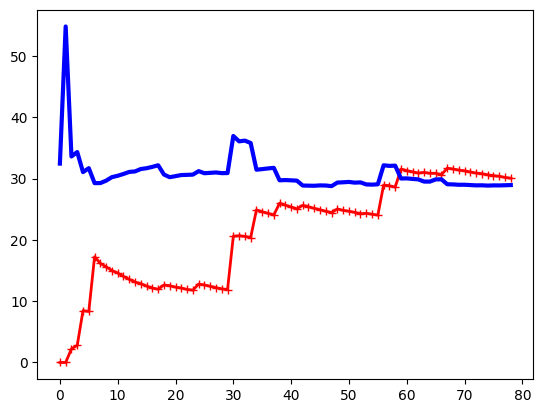

In [24]:
lin_reg=LinearRegression()
plot_learningcurves(lin_reg,X,y)

In [25]:
from sklearn.pipeline import Pipeline
poly_reg=Pipeline([
    ("poly_f",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),])


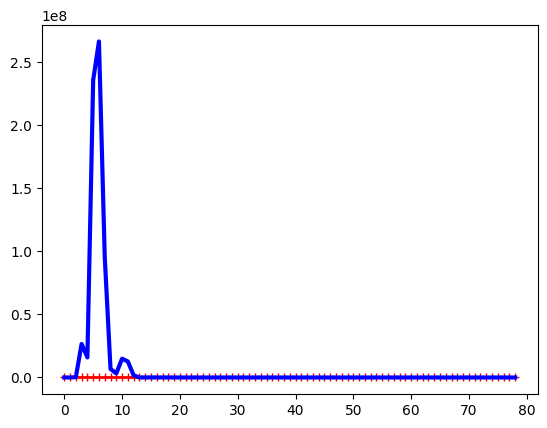

In [26]:
plot_learningcurves(poly_reg,X,y)

In [31]:
#early stopping
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#prepare the data
X_trainn,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
poly_scaler=Pipeline([
    ("poly_f",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler()),
])
X_train_poly_scaled=poly_scaler.fit_transform(X_trainn)
X_val_poly_scaled=poly_scaler.transform(X_val)
sgd_reg=SGDRegressor(max_iter=1,tol=-np.infty,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005)
minimum_val_eror=float("inf")
best_epoch=None
best_model=None
 
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val,y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

InvalidParameterError: The 'tol' parameter of SGDRegressor must be a float in the range [0.0, inf) or None. Got -inf instead.